# NLP EDA Template
[Template by Shahul ES](https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/9-0-eda-for-nlp-template-e8339407-5fc0-47cf-a304-994c0e2a689e/a9606b25-9906-439b-b141-165a162a874d)

# Load the data

In [1]:
import pandas as pd

data= pd.read_csv('data/abcnews-date-text.csv',nrows=1000)
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [2]:
TEXT_COLUMN = 'headline_text'
text = data[TEXT_COLUMN]

# Text Statistics

### Character Length Histogram

In [3]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

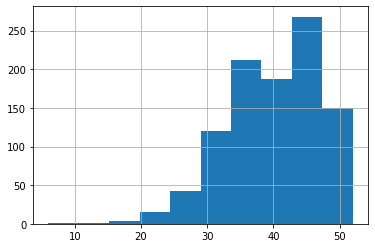

In [4]:
plot_character_length_histogram(text)

### Word Number Histogram

In [5]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

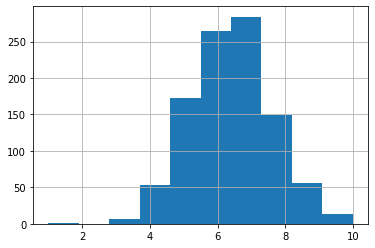

In [6]:
plot_word_number_histogram(text)

### Top Stopwords Barchart

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

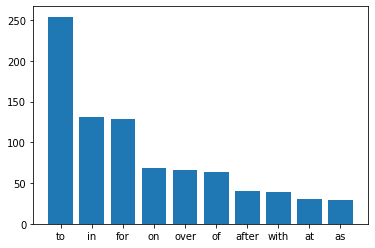

In [8]:
plot_top_stopwords_barchart(text)

### Top Non-Stopwords Barchart

In [9]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

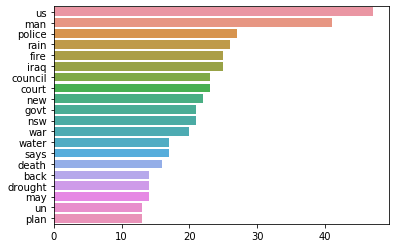

In [10]:
plot_top_non_stopwords_barchart(text)

# Top N-grams Barchart

In [11]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

### Bigrams

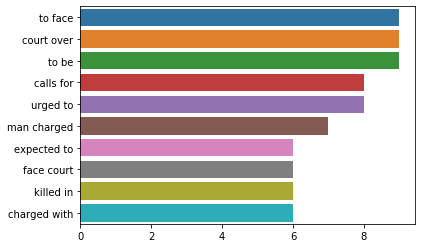

In [12]:
plot_top_ngrams_barchart(text,2)

### Trigrams

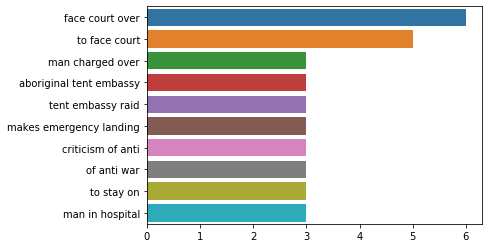

In [13]:
plot_top_ngrams_barchart(text,3)

# Topic Modelling LDA visualization

In [14]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [15]:
lda_model, bow_corpus, dic = get_lda_objects(text)
lda_model.show_topics()

[nltk_data] Downloading package stopwords to /home/jakub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.011*"iraq" + 0.007*"police" + 0.006*"water" + 0.005*"back" + 0.005*"council" + 0.004*"defends" + 0.004*"ta" + 0.004*"fire" + 0.004*"dead" + 0.004*"missing"'),
 (1,
  '0.007*"nsw" + 0.007*"rain" + 0.007*"govt" + 0.006*"claim" + 0.006*"death" + 0.006*"court" + 0.005*"day" + 0.005*"one" + 0.004*"call" + 0.004*"lead"'),
 (2,
  '0.007*"man" + 0.007*"plan" + 0.005*"record" + 0.005*"war" + 0.005*"group" + 0.004*"warne" + 0.004*"qantas" + 0.004*"new" + 0.004*"plane" + 0.004*"fund"'),
 (3,
  '0.012*"man" + 0.005*"win" + 0.005*"fire" + 0.005*"expected" + 0.005*"murder" + 0.005*"trial" + 0.004*"troop" + 0.004*"hospital" + 0.004*"charged" + 0.004*"say"')]

In [16]:
plot_lda_vis(lda_model, bow_corpus, dic)

/home/jakub/miniconda3/envs/eda-nlp/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.083926 -0.089557       1        1  26.591072
3      0.111008 -0.055115       2        1  26.169073
1      0.024654  0.079679       3        1  25.916868
0     -0.051736  0.064993       4        1  21.322983, topic_info=    Category       Freq   Term      Total  loglift  logprob
43   Default  18.000000   iraq  18.000000  30.0000  30.0000
317  Default  30.000000    man  30.000000  29.0000  29.0000
60   Default  14.000000   plan  14.000000  28.0000  28.0000
163  Default  11.000000  death  11.000000  27.0000  27.0000
280  Default   6.000000  group   6.000000  26.0000  26.0000
..       ...        ...    ...        ...      ...      ...
274   Topic4   2.815710  offer   8.829252   0.4025  -5.9599
115   Topic4   2.805908   fund   8.831109   0.3988  -5.9634
49    Topic4   2.979918    war  14.331018  -0.0251  -5.9032
163   Topic4   2.774392  death  11.585101   0.1161  -5.9747
437   Topic4   2.789823    new  15.715481  -0.1833  -5.9692

[277 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1361      1  0.971200     120
5         1  0.646120     act
5         2  0.323060     act
610       1  0.528541  action
610       2  0.396406  action
...     ...       ...     ...
243       3  0.329363    work
243       4  0.494045    work
956       1  0.835915  worker
956       4  0.208979  worker
132       1  0.727701   youth

[403 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

# Wordcloud

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /home/jakub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


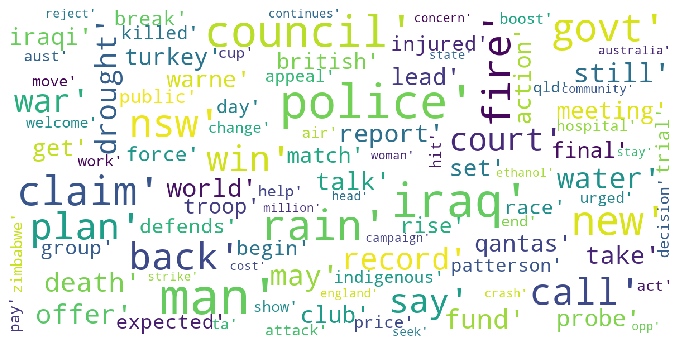

In [18]:
plot_wordcloud(text)

# Text Sentiment

### Polarity Histogram

In [19]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

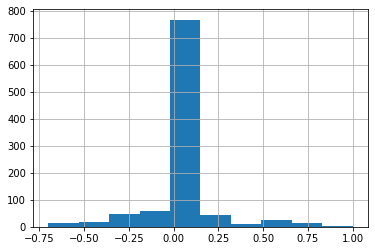

In [20]:
plot_polarity_histogram(text)

### Sentiment Barchart

In [21]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

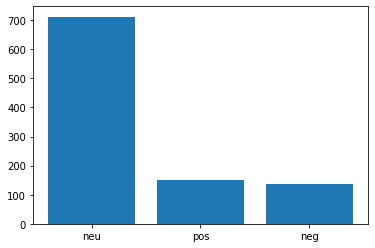

In [22]:
plot_sentiment_barchart(text, method='TextBlob')

# Named Entity Recognition

### Named Entity Barchart

In [23]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

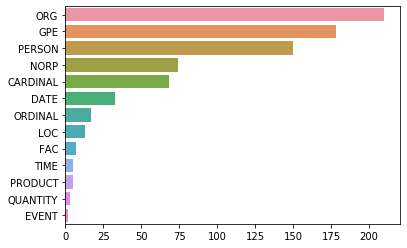

In [24]:
plot_named_entity_barchart(text)

### Most Common Entity Barchart

In [25]:
import spacy
from collections import  Counter
import seaborn as sns
import matplotlib.pyplot as plt

def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

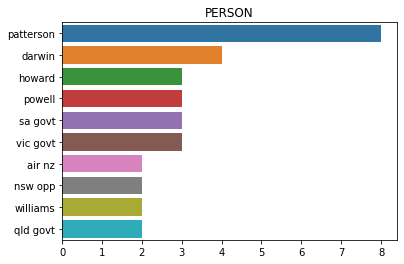

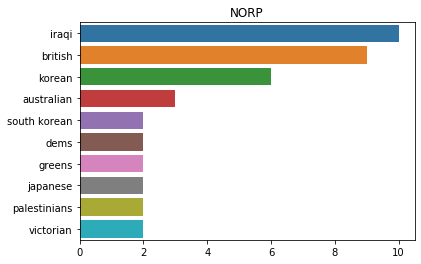

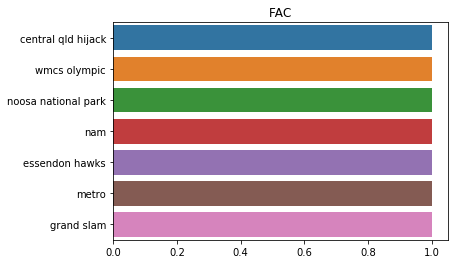

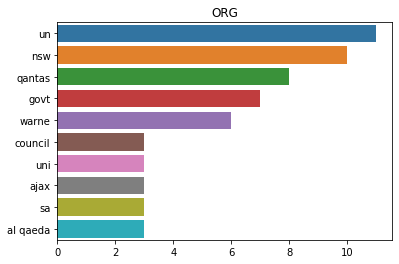

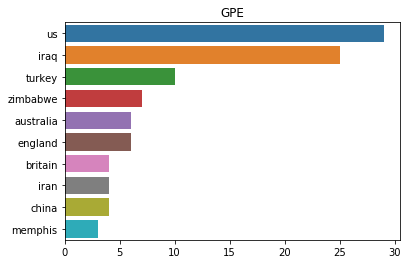

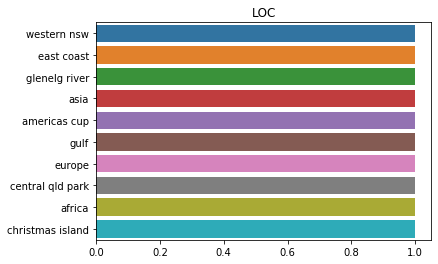

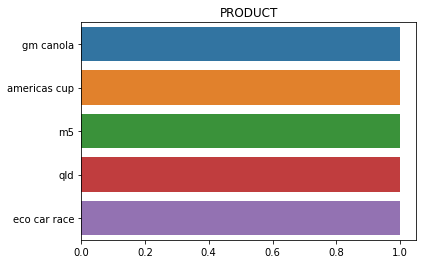

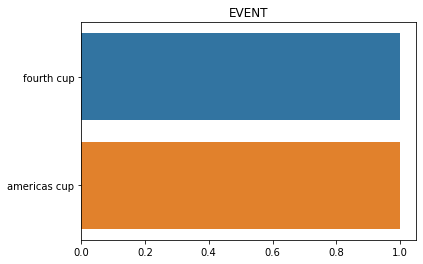

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

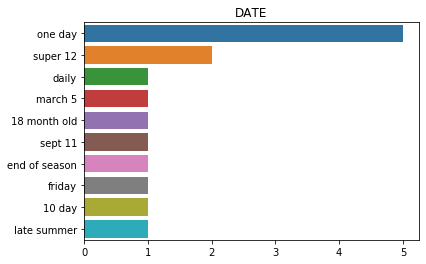

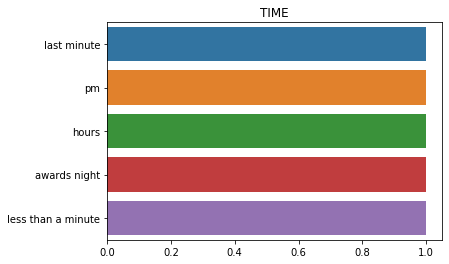

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

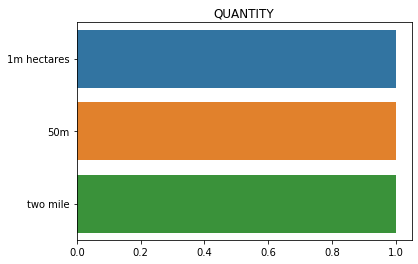

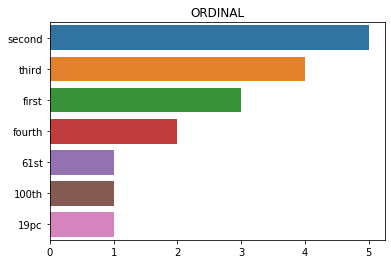

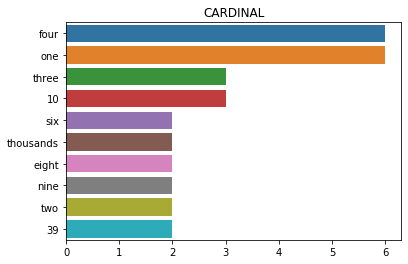

In [26]:
ENTITIES = [
    "PERSON",
    "NORP",
    "FAC",
    "ORG",
    "GPE",
    "LOC",
    "PRODUCT",
    "EVENT",
    "WORK_OF_ART",
    "LAW",
    "LANGUAGE",
    "DATE",
    "TIME",
    "PERCENT",
    "MONEY",
    "QUANTITY",
    "ORDINAL",
    "CARDINAL"
]

for entity in ENTITIES:
    try:
        fig = plt.figure()
        plot_most_common_named_entity_barchart(text, entity)
        plt.show()
    except Exception:
        pass

# Parts of Speach Tagging

### Parts of Speach Barchart

In [27]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


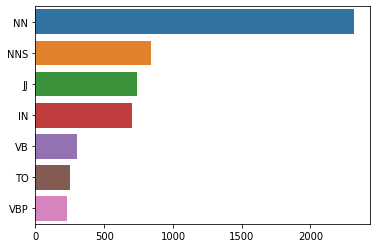

In [28]:
plot_parts_of_speach_barchart(text)

### Most Common Part of Speach Barchart

In [29]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


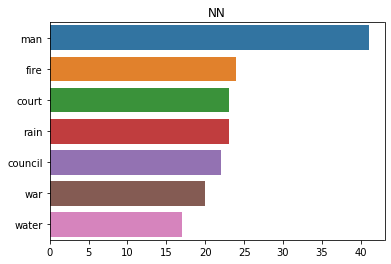

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


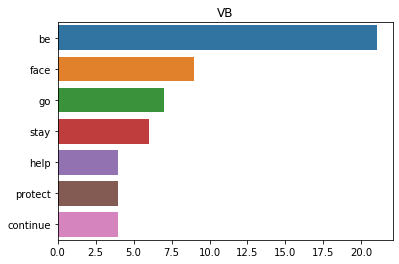

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


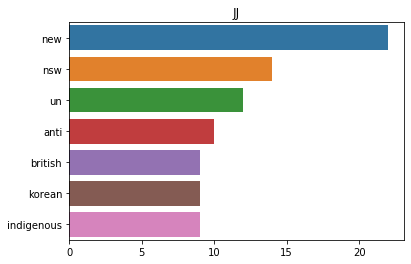

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


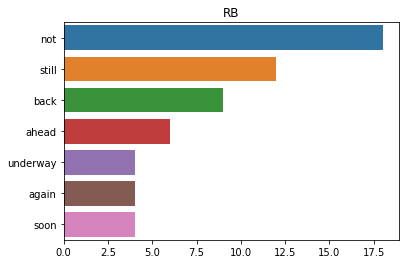

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


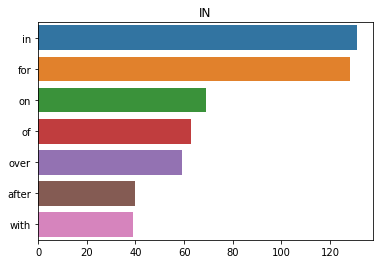

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


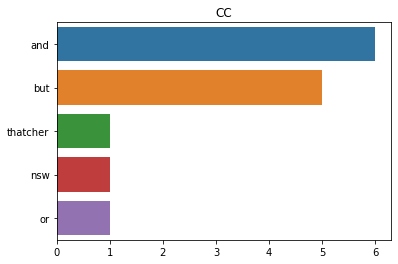

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


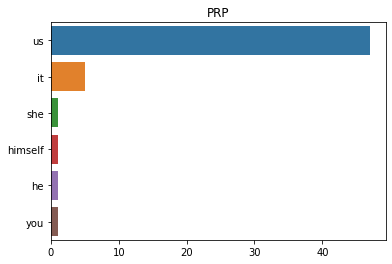

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jakub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<Figure size 432x288 with 0 Axes>

In [30]:
PARTS_OF_SPEACH = [
    "NN",
    "VB",
    "JJ",
    "RB",
    "IN",
    "CC",
    "PRP",
    "INT",
]

for part_of_speach in PARTS_OF_SPEACH:
    try:
        fig = plt.figure()
        plot_most_common_part_of_speach_barchart(text, part_of_speach)
        plt.show()
    except Exception:
        pass

# Text Complexity

### Text Complexity Histogram

In [31]:
from textstat import flesch_reading_ease

def plot_text_complexity_histogram(text):
    text.\
        apply(lambda x : flesch_reading_ease(x)).\
        hist()

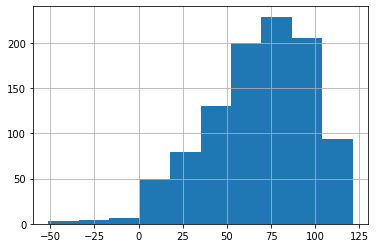

In [32]:
plot_text_complexity_histogram(text)